<a href="https://colab.research.google.com/github/websiteprofs/python/blob/main/Introduction_to_Neural_networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [3]:
cardio_data = pd.read_csv('Cardiotocographic.csv')

In [5]:
cardio_data.head()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,1


In [6]:
cardio_data.tail()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
2121,140,0.000000,0.000000,0.007426,0.0,0.0,0.0,79,0.2,25,7.2,40,137,177,2
2122,140,0.000775,0.000000,0.006971,0.0,0.0,0.0,78,0.4,22,7.1,66,103,169,2
2123,140,0.000980,0.000000,0.006863,0.0,0.0,0.0,79,0.4,20,6.1,67,103,170,2
2124,140,0.000679,0.000000,0.006110,0.0,0.0,0.0,78,0.4,27,7.0,66,103,169,2
2125,142,0.001616,0.001616,0.008078,0.0,0.0,0.0,74,0.4,36,5.0,42,117,159,1


In [7]:
cardio_data.describe()

,BPM,APC,FMPS,UCPS,DLPS,SDPS,PDPS,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003170,0.009474,0.004357,0.001885,0.000004,0.000157,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,1.304327
std,9.840844,0.003860,0.046670,0.002940,0.002962,0.000063,0.000580,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001876,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,1.000000
50%,133.000000,0.001630,0.000000,0.004482,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,1.000000
75%,140.000000,0.005631,0.002512,0.006525,0.003264,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,1.000000
max,160.000000,0.019284,0.480634,0.014925,0.015385,0.001353,0.005348,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,3.000000


In [8]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPM     2126 non-null   int64  
 1   APC     2126 non-null   float64
 2   FMPS    2126 non-null   float64
 3   UCPS    2126 non-null   float64
 4   DLPS    2126 non-null   float64
 5   SDPS    2126 non-null   float64
 6   PDPS    2126 non-null   float64
 7   ASTV    2126 non-null   int64  
 8   MSTV    2126 non-null   float64
 9   ALTV    2126 non-null   int64  
 10  MLTV    2126 non-null   float64
 11  Width   2126 non-null   int64  
 12  Min     2126 non-null   int64  
 13  Max     2126 non-null   int64  
 14  NSP     2126 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 249.3 KB


In [9]:
cardio_data.shape

(2126, 15)

In [10]:
cardio_data['NSP'].value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


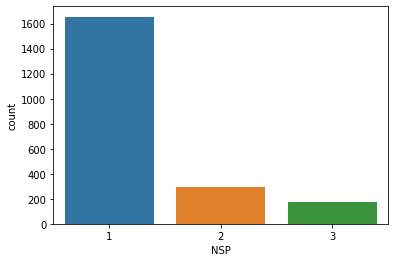

In [11]:
sns.countplot(cardio_data['NSP'])

Divide the data into input(X) and output(y). Note we are subtracting 1, from the output variable because our Keras assumes a class label starting from 0 and our NSP variable value from our output data started from 1. 

In [12]:
X = cardio_data.drop('NSP', axis=1)
y = cardio_data['NSP'] -1

Divide the input variables (X) and output variables (y) into train and test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=99)

Scale the data using the StandardScaler function

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Building and Training the Neural Network: Using Keras Sequential model that allows you to build network layer by layer. Note no of input neurons used is 8, input shape(14,) means we are selecting all the colums of the input(X) which is 14 from the cardio_data set. Also no of neuron used in the output(y) is 3, because our output label variable has either 0,1, or 2 (Normal, Suspect, or Pathologic). We used softmax because we have multiclass classification problem in the output.

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape = (14,))) 
model.add(tf.keras.layers.Dense(3, activation = "softmax"))

The next stage is to compile the model, by selecting an optimizer and a loss function. A common optimizer we use is Adam. While categorical cross entropy is used for loss function classification

In [16]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

To view a summary of the network we have built

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 120       
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


We are to train the neural network by setting the paramters, batch_size, epochs, verbose, validation_split. Note: because we have an imbalance class, i.e, there are more observation of the class 0 as compared to class 1 and class 2 as seen from the graph above on line 11. we need to address this when training by weighting the class in inverse proportion to the % of observations in that class. we use the class_weight parameter to do this.
0 class will have a weight of 1,
1 class will have a weight of 6,
2 class will have a weight of 7

In [20]:
from sklearn.utils import class_weight
class_weights = {0:1, 1:6, 2:7}

In [21]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose = 2, class_weight=class_weights, validation_split=0.2)

Epoch 1/50
170/170 - 3s - loss: 2.4447 - accuracy: 0.5728 - val_loss: 0.8609 - val_accuracy: 0.6735 - 3s/epoch - 18ms/step
Epoch 2/50
170/170 - 0s - loss: 1.9283 - accuracy: 0.6743 - val_loss: 0.7142 - val_accuracy: 0.7265 - 459ms/epoch - 3ms/step
Epoch 3/50
170/170 - 0s - loss: 1.6949 - accuracy: 0.7353 - val_loss: 0.6195 - val_accuracy: 0.7471 - 463ms/epoch - 3ms/step
Epoch 4/50
170/170 - 0s - loss: 1.5378 - accuracy: 0.7618 - val_loss: 0.5511 - val_accuracy: 0.7765 - 454ms/epoch - 3ms/step
Epoch 5/50
170/170 - 0s - loss: 1.4241 - accuracy: 0.7765 - val_loss: 0.5084 - val_accuracy: 0.7912 - 378ms/epoch - 2ms/step
Epoch 6/50
170/170 - 0s - loss: 1.3146 - accuracy: 0.7934 - val_loss: 0.4755 - val_accuracy: 0.8059 - 450ms/epoch - 3ms/step
Epoch 7/50
170/170 - 1s - loss: 1.2258 - accuracy: 0.7934 - val_loss: 0.4434 - val_accuracy: 0.8235 - 718ms/epoch - 4ms/step
Epoch 8/50
170/170 - 1s - loss: 1.1498 - accuracy: 0.8044 - val_loss: 0.4173 - val_accuracy: 0.8353 - 822ms/epoch - 5ms/step
Ep

Evaluating the Network: To see how this network performs when making prediction for the test data which we held back

Once the training has completed, we can plot the training and validation accuracy using the below code. The characteristic shape of this curve shows a steep increase in accuracy to start with, and then a more gradual increase in accuracy subsequently

In [22]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

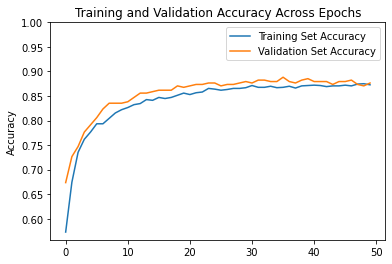

In [24]:
plt.plot(accuracy, label = 'Training Set Accuracy')
plt.plot(validation_accuracy, label = 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

We can also plot the training and validation loss using the below code. The characteristic shape of this curve shows a steep decrease in loss to start with, and then a more gradual decrease in loss subsequently. If our model is starting to overfit, the validation loss may start to increase again.

In [25]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

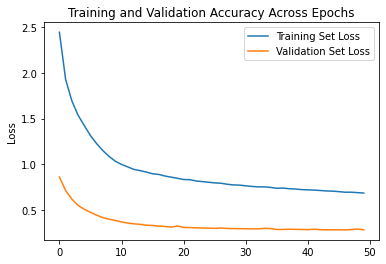

In [26]:
plt.plot(loss, label = 'Training Set Loss')
plt.plot(validation_loss, label = 'Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

From Scikit Learn, we are going to import the confusion_matrix and classification_report functions which we can use to evaluate our model performance on the test data.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

We can use the predict function on our trained model to generate predictions for the test data. This will output three values for each observation, one for each of the output neurons. Since these are the probabilities that the observation belongs to each of the three classes, we want to pick the class which has the highest associated probability value. We can use the argmax function for this.

In [28]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis = 1)

14/14 [==============================] - 0s 2ms/step


Use the confusion_matrix function to generate a confusion matrix using our generated predictions (y_pred) and the true class labels for the test data (y_test). We use a seaborn heatmap to visualise these results.

In [29]:
confusion_matrix = confusion_matrix(y_test, y_pred)

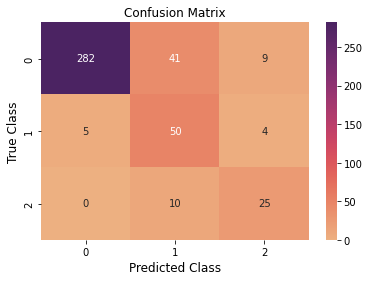

In [31]:
ax = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

Finally, we can use the classification_report function to view some key evaluation metrics for this model.

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       332
           1       0.50      0.85      0.62        59
           2       0.66      0.71      0.68        35

    accuracy                           0.84       426
   macro avg       0.71      0.80      0.74       426
weighted avg       0.89      0.84      0.85       426

